# MECH6480 - Virtual Environment and Plotting Demo
## Week 01

Author: @TravisMitchell - t.mitchell@uq.edu.au

* Aim of demo:

    * Demonstrate how to create a virtual environment
    * Demonstrate how to install packages into a virtual environment
    * Demonstrate how to use a virtual environment
    * Demonstrate how to plot data using matplotlib

### Creating a virtual environment

It is good practice when creating python projects to create a virtual environment. This is a way of isolating the packages you install for a particular project from the packages you have installed globally on your computer. This is particularly useful when you are working on multiple projects that require different versions of the same package.

To create a virtual environment, open a terminal and navigate to the directory you want to create the virtual environment in. Then type the following command:

```bash
python -m venv <name of virtual environment>
```

Activating this will give us an 'isolated' python environment. To activate the virtual environment, type the following command:

```bash
./<name of virtual environment>/Scripts/Activate.ps1 # windows
source <name of virtual environment>/bin/activate # linux
```

In VS Code, there are tools that help us manage virtual environments. To create a virtual environment, open the command palette (Ctrl+Shift+P) and type 'Python: Create Virtual Environment'. This will create a virtual environment in the current directory. To activate the virtual environment, click on the python interpreter in the bottom left corner of the screen and select the virtual environment you want to use. You are welcome to use this method, but we will demo with the terminal as it is more portable and suits those that dont use VS Code. Note when we run the commands above, VS Code will often prompt saying that it has noticed a virtual environment and ask if you want to use it. You can click yes to this.

### Installing packages into a virtual environment

If we want to install packages into our virtual environment, we can use the pip command. For example, if we want to install numpy, we can type the following command:

```bash
pip install numpy
```

However, a method that allows you to keep track of the packages you have installed is to create a requirements.txt file. This is a file that lists all the packages you have installed in your virtual environment. To create this file, type the following command:

```bash
pip freeze > requirements.txt
```

You can then either keep using pip install, but I prefer to add the packages I want to install first to requirements.txt and then use:

```bash
pip install -r requirements.txt
```

Remember, you can specify versions in requirements.txt using '==' or '>='. If you want to use Jupyter Notebooks (I will use this in some demos), you can run them in VS Code, but need ipykernel installed in your virtual environment. So we can add this to requirements.txt and then install it using the command above. Notice that if we now use pip freeze, there are ipykernel and its dependencies but all I need in requirements.txt is ipykernel.




### Plotting data using matplotlib

Matplotlib is a plotting library for python. It is very powerful and can be used to create a wide range of plots. We will only scratch the surface of what is possible in this demo. 

For this plotting exercise, we will need a few extra packages - so add these to your requirements.txt and install them:
    
    - matplotlib
    - yfinance
    - pandas
    - pandas_datareader
    - datetime

In [3]:
import sys
sys.path.append('contact-w-01/')

import stock_data_helper_funcs as sdhf
from datetime import datetime

print(dir(sdhf))
help(sdhf.clean_header)
help(sdhf.get)


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'clean_header', 'get', 'pd', 'pdr', 'yf']
Help on function clean_header in module stock_data_helper_funcs:

clean_header(df)
    Clean up the header of a dataframe produced from Yahoo Finance.

Help on function get in module stock_data_helper_funcs:

get(tickers, startdate, enddate)
    Get stock data from Yahoo Finance:
    Input: tickers (list of strings), startdate (string), enddate (string)



In [4]:
stocks = ["ANZ.AX","MQG.AX","NAB.AX","SUN.AX","WBC.AX"]

start_stocks = datetime(2019, 1, 1)  
end_stocks = datetime.today()        

all_data = sdhf.get(stocks, start_stocks, end_stocks)    # Scrap yahoo finance for the stock data
sdhf.clean_header(all_data)                              
print(all_data.head(5)) # What does our data look like?
all_data.to_csv('stock_data_' + start_stocks.strftime("%Y%m%d") +'-' + end_stocks.strftime("%Y%m%d") +'.csv', index=True, header=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                        open       high        low      close  adj_close  \
ticker date                                                                
ANZ.AX 2019-01-02  24.440001  24.440001  23.809999  23.860001  18.919106   
       2019-01-03  24.030001  24.389999  23.879999  24.340000  19.299709   
       2019-01-04  24.170000  24.299999  23.950001  24.250000  19.228346   
       2019-01-07  24.510000  24.700001  24.450001  24.590000  19.497936   
       2019-01-08  24.639999  24.969999  24.430000  24.860001  19.712029   

                    volume  
ticker date                 
ANZ.AX 2019-01-02  4061443  
       2019-01-03  5152249  
      

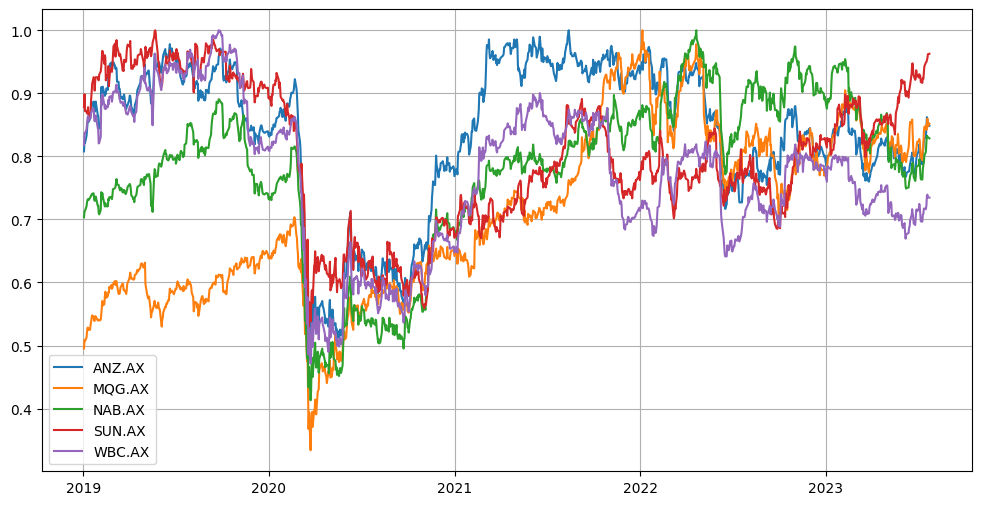

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(12,6))
for ticker in stocks:
    plotData = all_data[all_data.index.get_level_values('ticker').isin([ticker])].reset_index()
    ax.plot_date(plotData.date, plotData.close/plotData.close.max(),'-',label=ticker)

ax.legend(loc='best')
ax.grid(True)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

### Version stamping saved plots in Git

So that you know what code version generated your plots, it is good practice to add a version stamp to your plots. This can be done using the following code:

In [7]:
import git # add gitpython to your requirements.txt!
repo = git.Repo(search_parent_directories=True)
sha = repo.head.object.hexsha
fig.savefig('stock_data_' + start_stocks.strftime("%Y%m%d") +'-' + end_stocks.strftime("%Y%m%d") + '_commit-' + sha + '.png')